Henry Oldroyd. Notebook for machine learning presentation
Linear and Polynomial Regression Demo.

In [1]:
# import the relevant modules
from random import uniform, shuffle
import matplotlib.pyplot as plot

Uncomment the suitable section of code to demo linear vs polynomial regression. Feel free to tweek the variable values and see what happens

In [3]:
# polynomial regression demo

# here are the alternative configurations for a polynomial function
x_range = [-5, 5]
coefficient_range = [-3, 3]
polynomial_terms = 4
noise = [3/4, 4/3]

total_data_points = 20_000
num_train_points = int(0.7*total_data_points)
num_test_points = int(0.2*total_data_points)
num_validation_points = int(0.1*total_data_points)

epochs = 20
batch_size = 50
learning_rate = 10**-4


Note, due to the random number generator being accross a similar range, sometimes similar target and current polynomial functions are generated that, rerunning the code should fix this. 

In [4]:
# generate 2 coefficient arrays of random coefficient values
target_coefficients = [uniform(*coefficient_range) for _ in range(polynomial_terms)]
current_coefficients = [uniform(*coefficient_range) for _ in range(polynomial_terms)]


# print out these arrays
print("Target function is")
print(" + ".join(f"{c:.4f}*x^{i}" for i, c in enumerate(target_coefficients)))
print("current function is")
print(" + ".join(f"{c:.4f}*x^{i}" for i, c in enumerate(current_coefficients)))


# here is a function to evluate a polynomial at x
def polynomial_function(x, coefficients):
    return sum(c*x**i for i, c in enumerate(coefficients))

Target function is
-2.8065*x^0 + 2.8343*x^1 + 0.8866*x^2 + 2.5364*x^3
current function is
-1.0411*x^0 + -2.7920*x^1 + -0.1325*x^2 + 2.7111*x^3


In [5]:
# generate arrays of input x values for each sub dataset
train_x_points = [uniform(*x_range) for _ in range(num_train_points)]
test_x_points = [uniform(*x_range) for _ in range(num_test_points)]
validation_x_points = [uniform(*x_range) for _ in range(num_validation_points)]

# use the target polynomial coefficients to create the y data and add noise to the training and validaiton data 
# (could add noise to test data but I didn't)
test_y_points = [polynomial_function(x, target_coefficients) for x in test_x_points]
train_y_points = [polynomial_function(x, target_coefficients) * uniform(*noise) for x in train_x_points]
validation_y_points = [polynomial_function(x, target_coefficients) * uniform(*noise) for x in validation_x_points]

# print out first 10 coordiantes from training set
[[x, y] for x, y in zip(train_x_points[:10], train_y_points[:10])]

[[-2.0719939228783546, -25.707038041801564],
 [3.121880015466381, 75.78728429372391],
 [-1.189528962777442, -12.139053184613324],
 [2.203792061097092, 46.40575219328053],
 [-4.0867494034468255, -217.97636092987784],
 [-2.417070602357593, -32.17223981090142],
 [-0.8229193389536569, -7.667826042400184],
 [3.6821430164398237, 125.50312358912242],
 [-4.254269665408772, -193.0250476227659],
 [1.2236919716540475, 5.6985217686397815]]

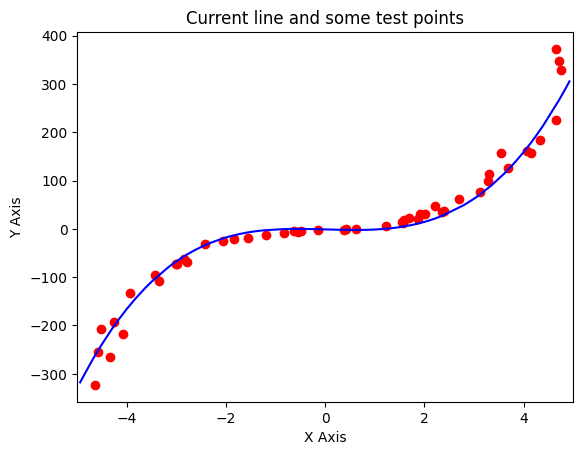

In [6]:
# plot the graph of how the current function performs against some trainign data points
plot.title("Current line and some test points")
plot.xlabel("X Axis")
plot.ylabel("Y Axis")

# Plotting the line
function_x_points = sorted([uniform(*x_range) for _ in range(100)])
function_y_points = [polynomial_function(x, current_coefficients) for x in function_x_points]
plot.plot(function_x_points, function_y_points, label="current function", color="blue")

# Plotting the points
plot.scatter(train_x_points[:50], train_y_points[:50], label="training points", color="red")

plot.xlim(left=x_range[0], right=x_range[1])
# plot.ylim(bottom=0, top=10)

# Show plot
plot.show()

In [7]:
# compute the loss of the funtion using the mean error squared accross all the test data
test_loss = (1/num_test_points) * sum(
    (polynomial_function(x, current_coefficients) - y)**2
    for x, y in zip(test_x_points, test_y_points)
)
test_loss

192.0308194303896

In [8]:
# the demonstrates that the loss is similar with a large enough sample of the test data items
test_loss = (1/200) * sum(
    (polynomial_function(x, current_coefficients) - y)**2
    for x, y in zip(test_x_points[:50], test_y_points[:50])
)
test_loss

44.897178227315536

train with x data

In [9]:
num_batches = num_train_points // batch_size


# varaibles to store state in the loop
coefficient_gradients = [None for _ in range(polynomial_terms)]
training_points_indexes = list(range(num_train_points))
last_validation_loss = None


# for each epoch
for _ in range(epochs):
    shuffle(training_points_indexes)
    # for each minibathc
    for batch_i in range(num_batches):
        # gather the training data for the batch
        batch_indexes = training_points_indexes[batch_size*batch_i: batch_size*(batch_i+1)]
        batch_x_data = [train_x_points[i] for i in batch_indexes]
        batch_y_data = [train_y_points[i] for i in batch_indexes]


        # for each coefficient
        for coefficient_i in range(polynomial_terms):
            # compute training loss gradient
            coefficient_gradients[coefficient_i] = (1/batch_size) * sum(
                2*(polynomial_function(x, current_coefficients) - y)*x**coefficient_i
                for x, y in zip(batch_x_data, batch_y_data)
            )

        # for each coefficent
        for coefficient_i in range(polynomial_terms):
            # perform SGD algorithm with gradient to learn coefficient
            current_coefficients[coefficient_i] -= learning_rate * coefficient_gradients[coefficient_i]

    # identify the validation loss for each epoch
    new_validation_loss = (1/num_validation_points) * sum(
        (polynomial_function(x, current_coefficients) - y)**2
        for x, y in zip(validation_x_points, validation_y_points)
    )

    # if the validation loss has increased since the last epoch this indicates overfitting so end trainign
    print(f"validation loss was:   {new_validation_loss:.6f}")
    if last_validation_loss is not None:
        if new_validation_loss > last_validation_loss:
            print("Ending training, validation loss increasing")
            break
    last_validation_loss = new_validation_loss

validation loss was:   468.900512
validation loss was:   457.877183
validation loss was:   459.929306
Ending training, validation loss increasing


In [10]:
# print out new coeffients after learning fuction
print("Target function is")
print(" + ".join(f"{c:.4f}*x^{i}" for i, c in enumerate(target_coefficients)))
print("current function is")
print(" + ".join(f"{c:.4f}*x^{i}" for i, c in enumerate(current_coefficients)))


Target function is
-2.8065*x^0 + 2.8343*x^1 + 0.8866*x^2 + 2.5364*x^3
current function is
-1.1021*x^0 + -1.6354*x^1 + 0.7960*x^2 + 2.8464*x^3


In [11]:
# show the new loss on the test data after training
test_loss = (1/num_test_points) * sum(
    (polynomial_function(x, current_coefficients) - y)**2
    for x, y in zip(test_x_points, test_y_points)
)
test_loss

36.18324956280977

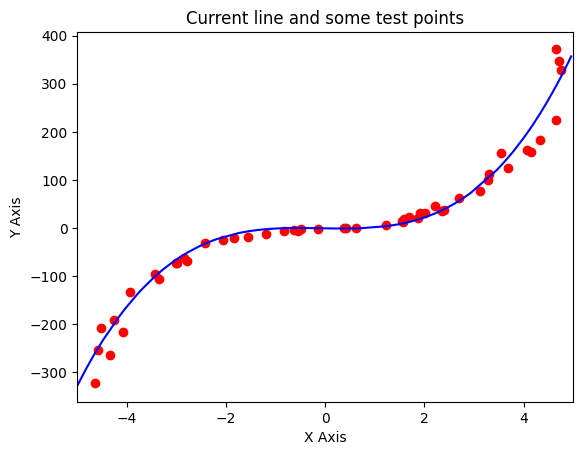

In [12]:
# show graph of learned function against teh same training data
plot.title("Current line and some test points")
plot.xlabel("X Axis")
plot.ylabel("Y Axis")

# Plotting the line
function_x_points = sorted([uniform(*x_range) for _ in range(100)])
function_y_points = [polynomial_function(x, current_coefficients) for x in function_x_points]
plot.plot(function_x_points, function_y_points, label="current function", color="blue")

# Plotting the points
plot.scatter(train_x_points[:50], train_y_points[:50], label="training points", color="red")

plot.xlim(left=x_range[0], right=x_range[1])
# plot.ylim(bottom=0, top=10)

# Show plot
plot.show()

Part 2, perceptron

In [13]:
# import modules
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, Input, Softmax
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

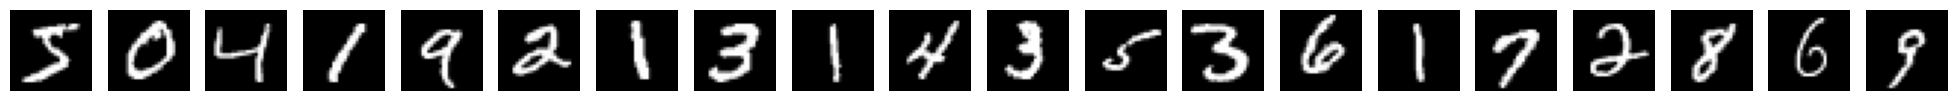

In [15]:
# show some of the images we will learn to classify
num_images = 20
selected_images = train_images[:num_images]

plt.figure(figsize=(25, 25))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [16]:
# Normalize to between -1 and 1
train_images = (train_images - 127.5) / 127.7
test_images = (test_images - 127.5) / 127.7

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# here is an example neural network structure to learn this pattern
model_FFN = Sequential()

# it takes in a 28x28 matrix
model_FFN.add(Input((28, 28, 1)))
model_FFN.add(Flatten())

# it includes 2 hidden layers (overkill)
model_FFN.add(Dense(20))
model_FFN.add(LeakyReLU(alpha=0.1))

model_FFN.add(Dense(20))
model_FFN.add(LeakyReLU(alpha=0.1))

# it outputs a 10 item probability vector
model_FFN.add(Dense(10))
model_FFN.add(Softmax())

In [18]:
# compile model with optimisers
model_FFN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# train the model on our training data set
model_FFN.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=50,
)

Epoch 1/10


1200/1200 [==============================] - 3s 2ms/step - loss: 0.4926 - accuracy: 0.8521
Epoch 2/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2824 - accuracy: 0.9172
Epoch 3/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2394 - accuracy: 0.9280
Epoch 4/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2148 - accuracy: 0.9361
Epoch 5/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1993 - accuracy: 0.9408
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1817 - accuracy: 0.9459
Epoch 7/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1688 - accuracy: 0.9501
Epoch 8/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1591 - accuracy: 0.9522
Epoch 9/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1506 - accuracy: 0.9541
Epoch 10/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1

In [20]:
# evaluate the accuracy and loss
test_loss, test_accuracy = model_FFN.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1703 - accuracy: 0.9511
Test Accuracy: 95.11%
